In [1]:
import numpy as np
import pandas as pd

In [2]:
season21 = pd.read_csv('../../data/bbref-files/2021-22.csv')

In [3]:
season21.head(30)

,Player,Date,Team,Against,Home,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameLink
0,Joe Harris,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,30:46,3,9.0,0.333,3.0,...,2.0,2.0,2.0,0.0,0.0,2.0,1.0,9.0,3.5,https://www.basketball-reference.com/boxscores...
1,James Harden,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,30:38,6,16.0,0.375,4.0,...,5.0,8.0,8.0,1.0,2.0,4.0,3.0,20.0,17.6,https://www.basketball-reference.com/boxscores...
2,Kevin Durant,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,30:15,13,25.0,0.520,3.0,...,11.0,11.0,4.0,0.0,2.0,1.0,2.0,32.0,24.2,https://www.basketball-reference.com/boxscores...
3,Nic Claxton,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,24:10,6,9.0,0.667,0.0,...,7.0,7.0,0.0,0.0,0.0,0.0,3.0,12.0,7.8,https://www.basketball-reference.com/boxscores...
4,Blake Griffin,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,22:59,2,5.0,0.400,0.0,...,4.0,5.0,0.0,1.0,0.0,1.0,1.0,6.0,4.8,https://www.basketball-reference.com/boxscores...
5,Patty Mills,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,29:22,7,11.0,0.636,7.0,...,2.0,2.0,2.0,1.0,1.0,0.0,1.0,21.0,19.4,https://www.basketball-reference.com/boxscores...
6,James Johnson,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,20:43,0,2.0,0.000,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,3.0,1.0,0.1,https://www.basketball-reference.com/boxscores...
7,Jevon Carter,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,18:57,0,3.0,0.000,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,-2.9,https://www.basketball-reference.com/boxscores...
8,LaMarcus Aldridge,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,15:42,0,2.0,0.000,0.0,...,3.0,3.0,1.0,0.0,1.0,1.0,2.0,1.0,-1.1,https://www.basketball-reference.com/boxscores...
9,Paul Millsap,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,5:13,0,0.0,NaN,0.0,...,2.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,https://www.basketball-reference.com/boxscores...


In [4]:
season21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28556 entries, 0 to 28555
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    28556 non-null  object 
 1   Date      28556 non-null  object 
 2   Team      28556 non-null  object 
 3   Against   28556 non-null  object 
 4   Home      28556 non-null  int64  
 5   MP        28556 non-null  object 
 6   FG        23991 non-null  object 
 7   FGA       23832 non-null  float64
 8   FG%       22646 non-null  float64
 9   3P        23832 non-null  float64
 10  3PA       23832 non-null  float64
 11  3P%       18693 non-null  float64
 12  FT        23832 non-null  float64
 13  FTA       23832 non-null  float64
 14  FT%       13117 non-null  float64
 15  ORB       23832 non-null  float64
 16  DRB       23832 non-null  float64
 17  TRB       23832 non-null  float64
 18  AST       23832 non-null  float64
 19  STL       23832 non-null  float64
 20  BLK       23832 non-null  fl

In [5]:
season21['FG'] = pd.to_numeric(season21['FG'],errors='coerce')

In [6]:
def compute_fantasy_score(df):
    '''
    WINAMAX fantasy score (miss for now +/- : point marqué/encaissé par l'équipe lorsque le joueur est sur le terrain)
    :param df: DataFrame
    :return:
    fantasy league points of each player and each game in a new DataFrame column
    '''
    # Shots
    three_succeed = df['3P']
    three_missed = df['3PA'] - three_succeed
    two_attemped = df['FGA'] - df['3PA']
    two_succeed = df['FG'] - three_succeed
    two_missed = two_attemped - two_succeed
    ft_succeed = df['FT']                       #free throw
    ft_missed = df['FTA'] - ft_succeed
    # Rebounds
    def_r = df['DRB'] #defensive
    off_r = df['ORB'] #offensive
    # Passes
    assists = df['AST']
    # Steals
    steals = df['STL']
    # Blocks
    blocks = df['BLK']
    # Turnover
    turnover = df['TOV']
    # Fouls
    fouls = df['PF']

    return two_succeed*2 + two_missed*(-0.5) + three_succeed*3 + three_missed*(-0.5) + ft_succeed + ft_missed*(-0.5) + def_r*0.75 + off_r + assists + steals*2 + blocks*2 + turnover*(-0.75) + fouls*(-0.5)

In [7]:
season21['FP'] = season21.apply(compute_fantasy_score,axis=1)

In [8]:
season21.head(20)

,Player,Date,Team,Against,Home,MP,FG,FGA,FG%,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameLink,FP
0,Joe Harris,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,30:46,3.0,9.0,0.333,3.0,...,2.0,2.0,0.0,0.0,2.0,1.0,9.0,3.5,https://www.basketball-reference.com/boxscores...,7.50
1,James Harden,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,30:38,6.0,16.0,0.375,4.0,...,8.0,8.0,1.0,2.0,4.0,3.0,20.0,17.6,https://www.basketball-reference.com/boxscores...,31.25
2,Kevin Durant,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,30:15,13.0,25.0,0.520,3.0,...,11.0,4.0,0.0,2.0,1.0,2.0,32.0,24.2,https://www.basketball-reference.com/boxscores...,39.00
3,Nic Claxton,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,24:10,6.0,9.0,0.667,0.0,...,7.0,0.0,0.0,0.0,0.0,3.0,12.0,7.8,https://www.basketball-reference.com/boxscores...,12.75
4,Blake Griffin,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,22:59,2.0,5.0,0.400,0.0,...,5.0,0.0,1.0,0.0,1.0,1.0,6.0,4.8,https://www.basketball-reference.com/boxscores...,9.25
5,Patty Mills,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,29:22,7.0,11.0,0.636,7.0,...,2.0,2.0,1.0,1.0,0.0,1.0,21.0,19.4,https://www.basketball-reference.com/boxscores...,26.00
6,James Johnson,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,20:43,0.0,2.0,0.000,0.0,...,0.0,2.0,0.0,1.0,0.0,3.0,1.0,0.1,https://www.basketball-reference.com/boxscores...,2.00
7,Jevon Carter,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,18:57,0.0,3.0,0.000,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,0.0,-2.9,https://www.basketball-reference.com/boxscores...,-1.25
8,LaMarcus Aldridge,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,15:42,0.0,2.0,0.000,0.0,...,3.0,1.0,0.0,1.0,1.0,2.0,1.0,-1.1,https://www.basketball-reference.com/boxscores...,2.00
9,Paul Millsap,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,5:13,0.0,0.0,NaN,0.0,...,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,https://www.basketball-reference.com/boxscores...,3.75


In [9]:
season21['Date'] = pd.to_datetime(season21['Date'])

In [10]:
season21.head()

,Player,Date,Team,Against,Home,MP,FG,FGA,FG%,3P,...,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameLink,FP
0,Joe Harris,2021-10-19,Brooklyn Nets,Milwaukee Bucks,0,30:46,3.0,9.0,0.333,3.0,...,2.0,2.0,0.0,0.0,2.0,1.0,9.0,3.5,https://www.basketball-reference.com/boxscores...,7.50
1,James Harden,2021-10-19,Brooklyn Nets,Milwaukee Bucks,0,30:38,6.0,16.0,0.375,4.0,...,8.0,8.0,1.0,2.0,4.0,3.0,20.0,17.6,https://www.basketball-reference.com/boxscores...,31.25
2,Kevin Durant,2021-10-19,Brooklyn Nets,Milwaukee Bucks,0,30:15,13.0,25.0,0.520,3.0,...,11.0,4.0,0.0,2.0,1.0,2.0,32.0,24.2,https://www.basketball-reference.com/boxscores...,39.00
3,Nic Claxton,2021-10-19,Brooklyn Nets,Milwaukee Bucks,0,24:10,6.0,9.0,0.667,0.0,...,7.0,0.0,0.0,0.0,0.0,3.0,12.0,7.8,https://www.basketball-reference.com/boxscores...,12.75
4,Blake Griffin,2021-10-19,Brooklyn Nets,Milwaukee Bucks,0,22:59,2.0,5.0,0.400,0.0,...,5.0,0.0,1.0,0.0,1.0,1.0,6.0,4.8,https://www.basketball-reference.com/boxscores...,9.25


In [11]:
def plot_player_stats(df, player, type='FP'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    """
    Plot any statistiques of a player during a season

    Paramètres :
    - df : season DataFrame
    - player : Player name 
    """
    # Filter
    df_player = df[df['Player'] == player]
    if df_player.empty:
        print(f"No data found for this player : {player}")
        return

    # Plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=df_player,
        x='Date',
        y=type,
        marker='o',
        color='b'
    )

    plt.title(f"{player} performance")
    plt.xlabel('Date')
    plt.ylabel(type)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

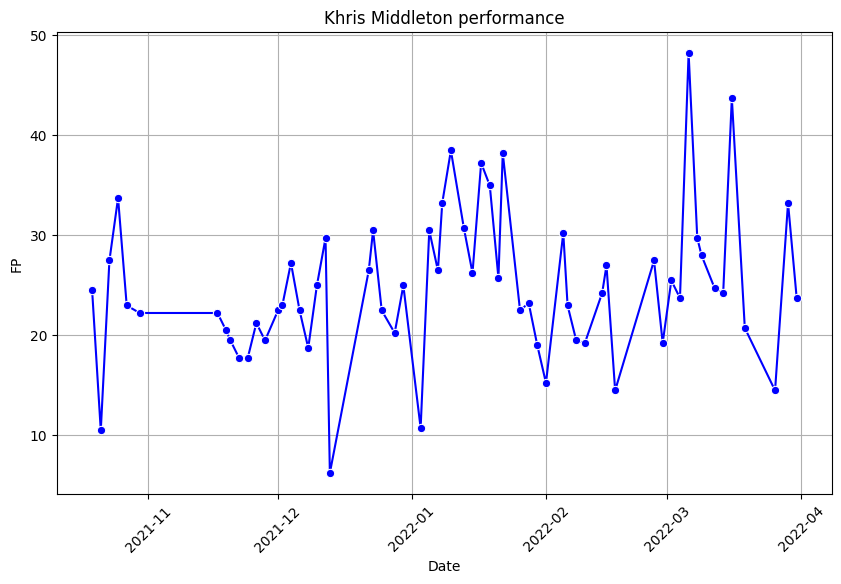

In [12]:
plot_player_stats(season21,player='Khris Middleton')

In [16]:
season21['Player'].value_counts()

Player
Mikal Bridges       76
Jordan Clarkson     76
Bryn Forbes         76
Jake Layman         76
Terance Mann        75
                    ..
Jason Preston        1
Ade Murkey           1
Trayvon Palmer       1
Matt Ryan            1
Gabriel Lundberg     1
Name: count, Length: 614, dtype: int64

In [18]:
season21.isna().sum()

Player          0
Date            0
Team            0
Against         0
Home            0
MP              0
FG           4724
FGA          4724
FG%          5910
3P           4724
3PA          4724
3P%          9863
FT           4724
FTA          4724
FT%         15439
ORB          4724
DRB          4724
TRB          4724
AST          4724
STL          4724
BLK          4724
TOV          4724
PF           4724
PTS          4724
+/-          4724
GameLink        0
FP           4724
dtype: int64

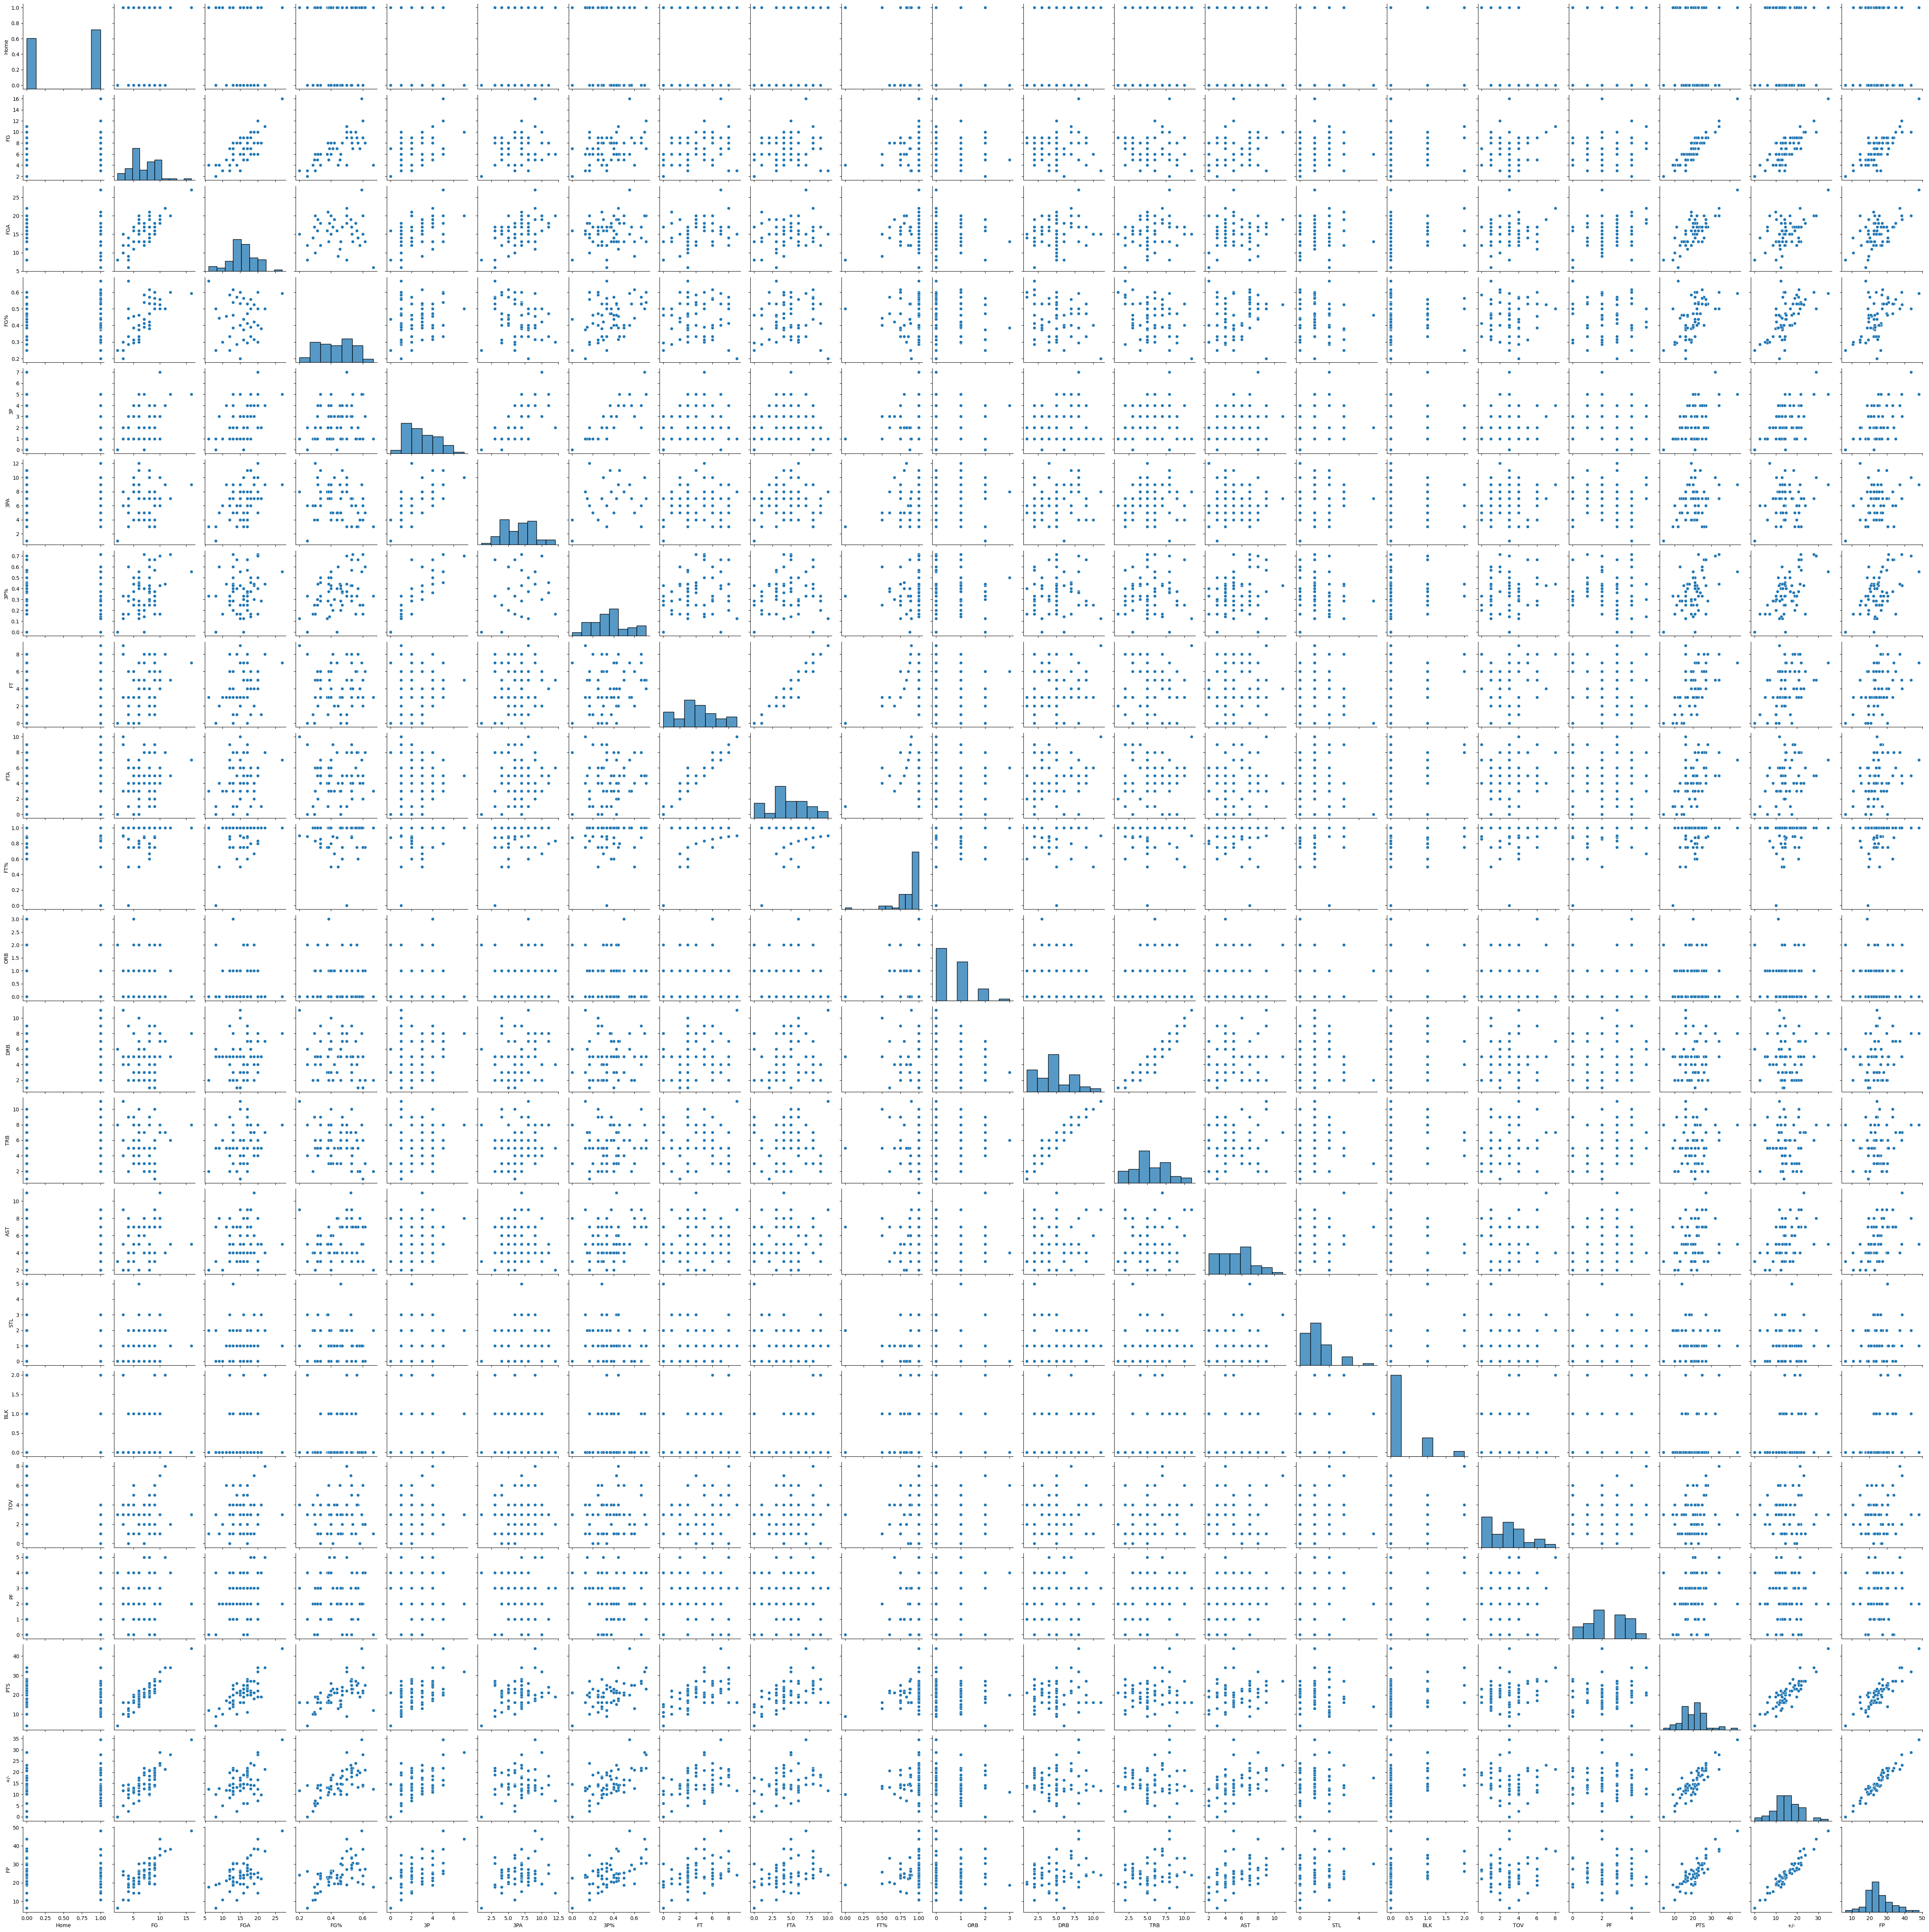

In [20]:
import seaborn as sns

player = 'Khris Middleton'
df_player = season21[season21['Player'] == player]
sns.pairplot(df_player)